<a href="https://colab.research.google.com/github/alimaazamat/AI4ALL/blob/main/CarbonFootprintExtendRecipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Retrieving necessary imports and Google Drive

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy.sparse import hstack

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


2) Combine the PP_recipes and RAW_recipes files on recipe ID to see all tokens, values, ingredient names, and descriptions both numerically and nominally. See the first 100 recipes.

In [ ]:
recipes_df = pd.read_csv('/content/drive/My Drive/AI4All/Recipes and Interactions Data/PP_recipes.csv')
recipe_names_df = pd.read_csv('/content/drive/My Drive/AI4All/Recipes and Interactions Data/RAW_recipes.csv')
carbon_footprint_df = pd.read_csv('/content/drive/My Drive/AI4All/Environmental Impacts Dataset/Food_Production.csv')
ingr_df = pd.read_csv('/content/drive/My Drive/AI4All/Recipes and Interactions Data/ingr_map.csv')
ratings_df = pd.read_csv('/content/drive/My Drive/AI4All/Recipes and Interactions Data/RAW_interactions.csv')
user_ratings_df = pd.read_csv('/content/drive/My Drive/AI4All/Recipes and Interactions Data/PP_users.csv')

merged_df = pd.merge(recipes_df, recipe_names_df, on='id', how='inner')

merged_df.head(100)

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",aromatic basmati rice rice cooker,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",pumpkin pie a la easy,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",cheesy tomato soup with potatoes,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",mini tacos,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]",rosemary s hanky panky s,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190651,129183,"[40480, 1301, 3329, 5409, 556, 31066, 40481]","[[5343, 535, 2044, 5409, 7087], [6020], [1353]...","[40480, 40482, 6672, 488, 19007, 5409, 7087, 2...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[912, 4987, 7655, 2499, 4570, 1218, 860, 1403]",black forest cake with cherries,120,295691,2006-10-14,"['time-to-make', 'course', 'main-ingredient', ...","[595.1, 41.0, 164.0, 25.0, 12.0, 25.0, 29.0]",8,"['prepare and bake cake mix , according to pac...","just the best cake, chocolate cake, with che...","[""devil's food cake mix"", 'oil', 'water', 'egg...",8
96,338407,126877,"[40480, 5333, 245, 705, 11, 5450, 4552, 5867, ...","[[705, 11, 5450, 4552, 10734], [6444], [1657, ...","[40480, 40482, 23667, 705, 11, 5450, 4552, 107...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[7135, 6906, 7820, 7655, 1833, 4987, 6416]",bits o teriyaki chicken,40,305531,2008-11-19,"['60-minutes-or-less'

3) Calculate the carbon footprint for each recipe based on the Environmental Impacts dataset. Remove the rows where there is carbon footprint of 0, which indicate no ingredient data. Show the first few entries.

In [ ]:
import ast

def calculate_carbon_footprint(recipe, ingr_df, carbon_footprint_df):
    total_footprint = 0
    ingredients_list = recipe.ingredients

    # Check if ingredients is a string and convert it to a list if necessary
    if isinstance(ingredients_list, str):
        ingredients_list = ast.literal_eval(ingredients_list)

    for ingredient in ingredients_list:
        # Get the 'replaced' category for the ingredient
        replaced_result = ingr_df.loc[ingr_df['raw_ingr'] == ingredient, 'replaced']

        # Check if the result is not empty
        if not replaced_result.empty:
            macro_category = replaced_result.values[0]

            # Get the total emissions for the 'replaced' category
            emissions_result = carbon_footprint_df.loc[carbon_footprint_df['Food product'] == macro_category, 'Total_emissions']

            # Check if the result is not empty and add to total footprint
            if not emissions_result.empty:
                total_footprint += emissions_result.values[0]
        else:
            # Handle the case where the ingredient is not found
            print(f"Ingredient '{ingredient}' not found in ingredient mapping.")

    return total_footprint

# Calculate carbon footprint and add to table
merged_df['carbon_footprint'] = merged_df.apply(lambda row: calculate_carbon_footprint(row, ingr_df, carbon_footprint_df), axis=1)
merged_df = merged_df[merged_df['carbon_footprint'] != 0]
print(merged_df.head())

# Calculate carbon footprint for first 100 entries of table and display
# test_merged_df = merged_df.head(1000)
# test_merged_df['carbon_footprint'] = test_merged_df.apply(lambda row: calculate_carbon_footprint(row, ingr_df, carbon_footprint_df), axis=1)
# test_merged_df = test_merged_df[test_merged_df['carbon_footprint'] != 0]
# print(test_merged_df.head())


# # Calculate and print the carbon footprint for each recipe
# for i, recipe in enumerate(merged_df.itertuples(index=False), start=1):
#     footprint = calculate_carbon_footprint(recipe, ingr_df, carbon_footprint_df)
#     print(f"Recipe {i} Carbon Footprint: {footprint}")


Ingredient 'ginger and chili paste' not found in ingredient mapping.
Ingredient 'pimento paste' not found in ingredient mapping.
Ingredient 'veal bratwursts' not found in ingredient mapping.
Ingredient 'antelope steak' not found in ingredient mapping.
Ingredient 'pringles fat free barbecue potato crisps' not found in ingredient mapping.
Ingredient 'ovolini' not found in ingredient mapping.
Ingredient 'damsons' not found in ingredient mapping.
Ingredient 'green olive tapenade' not found in ingredient mapping.
Ingredient 'salsa verde doritos' not found in ingredient mapping.
Ingredient 'egg roll crepes' not found in ingredient mapping.
Ingredient 'cream of chicken dijon soup' not found in ingredient mapping.
Ingredient 'unsalted butter-flavored crackers' not found in ingredient mapping.
Ingredient 'brown gravy' not found in ingredient mapping.
Ingredient 'lemon bar mix' not found in ingredient mapping.
Ingredient 'vegan sweet and sour sauce' not found in ingredient mapping.
Ingredient 'r

4) Prepare the recipe vectors and normalize the relevant features: calorie_level, n_steps, and carbon footprint.

Recipes with a calorie level greater than 0 have high calories. Recipes with greater than 8 steps are considered intensive (value = 1). Recipes with a carbon footprint greater than 10 are considered environmentally unfriendly (value = 1).

In [ ]:
# Keep relevant features in df and normalize numeric values
columns_to_keep = ['id', 'name', 'calorie_level', 'n_steps', 'carbon_footprint']
normalized_df = merged_df[columns_to_keep]
normalized_df.loc[:, 'calorie_level'] = (normalized_df['calorie_level'] > 0).astype(int)
normalized_df.loc[:, 'n_steps'] = (normalized_df['n_steps'] > 8).astype(int)
normalized_df.loc[:, 'carbon_footprint'] = (normalized_df['carbon_footprint'] > 10).astype(int)
# Create a merged table of the user ratings and relevant features of recipes.
merged_ratings_df = pd.merge(ratings_df, normalized_df, left_on='recipe_id', right_on='id', how="right")
print(merged_ratings_df.head())

   user_id  recipe_id        date  rating  \
0   522099     424415  2010-05-21       5   
1   171790     424415  2010-05-22       4   
2   491979     424415  2010-05-24       5   
3   724516     424415  2010-06-22       5   
4   480195     424415  2010-06-25       5   

                                              review      id  \
0  I really didn't expect to like this rice as mu...  424415   
1  What a wonderful aroma while cooking. Dinner g...  424415   
2  Perfect rice. We love Basmati RiceMade for ZWT...  424415   
3  Well I got perfect rice also, I served this wi...  424415   
4  The rice turned out perfectly and had good fla...  424415   

                                 name  calorie_level  n_steps  \
0  aromatic basmati rice  rice cooker              0        0   
1  aromatic basmati rice  rice cooker              0        0   
2  aromatic basmati rice  rice cooker              0        0   
3  aromatic basmati rice  rice cooker              0        0   
4  aromatic basmati

5) Function to calculate user profile

In [ ]:
import numpy as np
import ast

def calculate_user_profile(user_id, user_items, merged_ratings_df):
    if isinstance(user_items, str):
        user_items = ast.literal_eval(user_items)

    # Attempt to filter the ratings out by the user
    merged_ratings_df = merged_ratings_df[merged_ratings_df['user_id'] == user_id]
    print(merged_ratings_df.head())

    user_data = merged_ratings_df[merged_ratings_df['recipe_id'].isin(user_items)]
    weighted_sum_features = np.zeros(3)  # Assuming 3 features: calorie_level, n_steps, carbon_footprint
    sum_of_weights = 0

    for item, rating in zip(user_items, user_data['rating']):
        # Make sure to match the correct recipe ID column name
        features = user_data.loc[user_data['recipe_id'] == item, ['calorie_level', 'n_steps', 'carbon_footprint']].values

        if features.size > 0:
            weighted_features = features[0] * rating  # Use [0] to get the first and only row of features
            weighted_sum_features += weighted_features
            sum_of_weights += rating

    user_profile = weighted_sum_features / sum_of_weights if sum_of_weights != 0 else weighted_sum_features
    return user_profile

# # Apply the function to each user in the DataFrame
# user_ratings_df['user_profile'] = user_ratings_df.apply(
#     lambda row: calculate_user_profile(row['u'], row['items'], merged_ratings_df), axis=1
# )

# # Display the first few user profiles
# print(user_ratings_df[['u', 'user_profile']].head())

6) Calculate and display the profile for just one user.

User ID: 27
User Profile: [0.60888502 0.4738676  0.82229965]


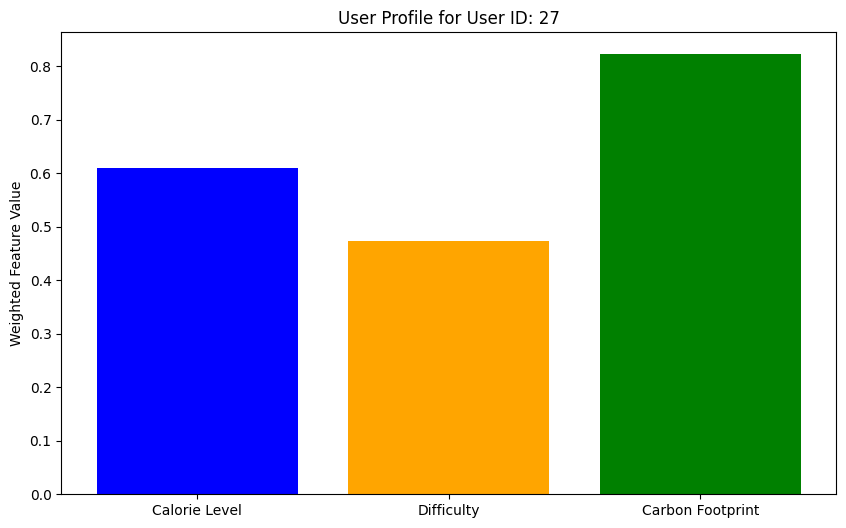

In [ ]:
import matplotlib.pyplot as plt

# Select data for one user from pp_users_df
user_id = user_ratings_df.iloc[27]['u']
user_items = user_ratings_df.iloc[27]['items']

# Now apply the function to this single user
user_profile = calculate_user_profile(user_id, user_items, merged_ratings_df)

print(f"User ID: {user_id}")
print("User Profile:", user_profile)

# Define feature names for display on the x-axis
feature_names = ['Calorie Level', 'Difficulty', 'Carbon Footprint']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, user_profile, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.ylabel('Weighted Feature Value')
plt.title(f'User Profile for User ID: {user_id}')

# Display the chart
plt.show()


7) Calculate a score for each recipe by multiplying the recipe features with the user's profile values and summing them up. Rank these recipes to get the top recommendations.

In [ ]:
# Ensure numpy and pandas are imported
import numpy as np
import pandas as pd

# Calculate the contribution of each feature to the score
merged_ratings_df['calorie_score'] = merged_ratings_df['calorie_level'] * user_profile[0]
merged_ratings_df['difficulty_score'] = merged_ratings_df['n_steps'] * user_profile[1]
merged_ratings_df['carbon_score'] = merged_ratings_df['carbon_footprint'] * user_profile[2]

# Calculate the total score for each recipe
merged_ratings_df['total_score'] = merged_ratings_df['calorie_score'] + merged_ratings_df['difficulty_score'] + merged_ratings_df['carbon_score']

# Sort the DataFrame by the total score in descending order to get the highest scores at the top
merged_ratings_df = merged_ratings_df.sort_values(by='total_score', ascending=False)

# Display the calculation for each step
display_columns = ['id', 'calorie_score', 'difficulty_score', 'carbon_score', 'total_score']
calculation_steps_df = merged_ratings_df[display_columns]

# Select the top 10 recipes
top_recipes = calculation_steps_df.head(10)

# The top_recipes DataFrame now contains the top 10 recommended recipes for the user
top_recipes


,id,calorie_score,difficulty_score,carbon_score,total_score
454443,60350,0.608885,0.473868,0.8223,1.905052
189949,117574,0.608885,0.473868,0.8223,1.905052
804293,237670,0.608885,0.473868,0.8223,1.905052
312405,41395,0.608885,0.473868,0.8223,1.905052
189983,431714,0.608885,0.473868,0.8223,1.905052
189982,431714,0.608885,0.473868,0.8223,1.905052
804288,237670,0.608885,0.473868,0.8223,1.905052
804289,237670,0.608885,0.473868,0.8223,1.905052
804290,237670,0.608885,0.473868,0.8223,1.905052
804291,237670,0.608885,0.473868,0.8223,1.905052
